There is two example datasets. You should load only one. 
Therefore, execute only "Alternative dataset" section or only "Main Dataset" section. Run "Fit model" after

## Alternative dataset

You can find data description here: https://archive.ics.uci.edu/ml/datasets/abalone

In [1]:
!if [ ! -e abalone.data ]; then wget http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data; fi

In [2]:
import pandas as pd
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
data = pd.read_csv("abalone.data", names=column_names)
print("Number of samples: %d" % len(data))
# for more complicated cases use sklearn.feature_extraction.DictVectorizer# for m 
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]
data.head()

Number of samples: 4177


length  diameter  height  whole weight  shucked weight  viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings      M      F      I  
0         0.150     15   True  False  False  
1         0.070      7   True  False  False  
2         0.210      9  False   True  False  
3         0.155     10   True  False  False  
4         0.055      7  False  False   True

In [3]:
data.describe(include='all')

length     diameter       height  whole weight  shucked weight  \
count   4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
unique          NaN          NaN          NaN           NaN             NaN   
top             NaN          NaN          NaN           NaN             NaN   
freq            NaN          NaN          NaN           NaN             NaN   
mean       0.523992     0.407881     0.139516      0.828742        0.359367   
std        0.120093     0.099240     0.041827      0.490389        0.221963   
min        0.075000     0.055000     0.000000      0.002000        0.001000   
25%        0.450000     0.350000     0.115000      0.441500        0.186000   
50%        0.545000     0.425000     0.140000      0.799500        0.336000   
75%        0.615000     0.480000     0.165000      1.153000        0.502000   
max        0.815000     0.650000     1.130000      2.825500        1.488000   

        viscera weight  shell weight        rings      M      F      I  
count      4177.000000   4177.000000  4177.000000   4177   4177   4177  
unique             NaN           NaN          NaN      2      2      2  
top                NaN           NaN          NaN  False  False  False  
freq               NaN           NaN          NaN   2649   2870   2835  
mean          0.180594      0.238831     9.933684    NaN    NaN    NaN  
std           0.109614      0.139203     3.224169    NaN    NaN    NaN  
min           0.000500      0.001500     1.000000    NaN    NaN    NaN  
25%           0.093500      0.130000     8.000000    NaN    NaN    NaN  
50%           0.171000      0.234000     9.000000    NaN    NaN    NaN  
75%           0.253000      0.329000    11.000000    NaN    NaN    NaN  
max           0.760000      1.005000    29.000000    NaN    NaN    NaN

In [4]:
import numpy as np
from sklearn import model_selection, tree

y = data.rings.values
del data["rings"] # remove rings from data, so we can convert all the dataframe to a numpy 2D array.
X = data.values.astype(np.float)

In [5]:
interval = len(y) / 2
ymap = {}
accum = 0
i = 0
for val in range(y.min(), y.max() + 1):
    delta = (y == val).sum()
    accum += delta
    if accum > interval:
        accum = delta
        i += 1
    ymap[val] = i
#print(ymap)
mapped_y = np.zeros(len(y), dtype=int)
for i, v in enumerate(y):
    mapped_y[i] = ymap[v]
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, mapped_y)
columns = data.columns

## Main Dataset

you can find data description here: https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls

In [ ]:
import pandas as pd
data_train = pd.read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet_name=1, usecols=5)
data_test = pd.read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet_name=2, usecols=5)
data_test = data_test.replace("Very Low", "very_low")
print("Number of samples: %d" % len(data_train))
data_train.head()

In [ ]:
data_train.describe(include='all')

In [17]:
import numpy as np
import sklearn
from sklearn import model_selection, tree

train_y = data_train[" UNS"].values
test_y = data_test[" UNS"].values
y = np.concatenate((train_y, test_y))
data_train.drop(" UNS", axis=1, inplace=True)
data_test.drop(" UNS", axis=1, inplace=True)
train_X = data_train.values.astype(np.float)
test_X = data_test.values.astype(np.float)
columns = data_train.columns

NameError: name 'data_train' is not defined

## Helpers 

In [6]:
from sklearn.tree import _tree
from sklearn.tree._tree import TREE_LEAF

def get_parents(tree):
    parents = {x:i for i, x in enumerate(tree.children_left) if x != TREE_LEAF}
    parents.update({x:i for i, x in enumerate(tree.children_right) if x != TREE_LEAF})
    return parents

def tree_depth(tree):
    max_depth = 0
    stack = [(0,0)]
    while stack:
        node, depth = stack.pop()
        if depth > max_depth:
            max_depth = depth
        if tree.children_left[node] != TREE_LEAF:
            stack.append((tree.children_left[node], depth+1))
        if tree.children_right[node] != TREE_LEAF:
            stack.append((tree.children_right[node], depth+1))
    return max_depth

def leaves_count(tree):
    leaves = 0
    stack = [(0)]
    while stack:
        node = stack.pop()
        if tree.children_left[node] != TREE_LEAF:
            stack.append((tree.children_left[node]))
        else:
            leaves += 1
        if tree.children_right[node] != TREE_LEAF:
            stack.append((tree.children_right[node]))
        else:
            leaves += 1
    return leaves // 2

## Fit model

We fit regular DecisionTree model for classifiation task.

In [7]:
model = tree.DecisionTreeClassifier()
model = model.fit(train_X, train_y)

In [8]:
model.score(test_X, test_y)

0.6239234449760765

In [9]:
params = {
    "min_samples_leaf": list(range(5, 30, 1)),
    "min_samples_split": list(range(2, 4, 1)),
    "criterion": ["gini", "entropy"],
}
gs = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), params, n_jobs=3, verbose=1)
gs = gs.fit(train_X, train_y)
gs.score(test_X, test_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    1.1s finished


0.6899521531100479

In [10]:
gs.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 28, 'min_samples_split': 2}

In [11]:
model = tree.DecisionTreeClassifier(**gs.best_params_)
model = model.fit(train_X, train_y)
print(model.score(train_X, train_y), model.score(test_X, test_y))

0.7528735632183908 0.6899521531100479


In [12]:
print(f"Our initial tree have {leaves_count(model.tree_)} leaves and {tree_depth(model.tree_)} depth")

Our initial tree have 78 leaves and 11 depth


Here is our tree:

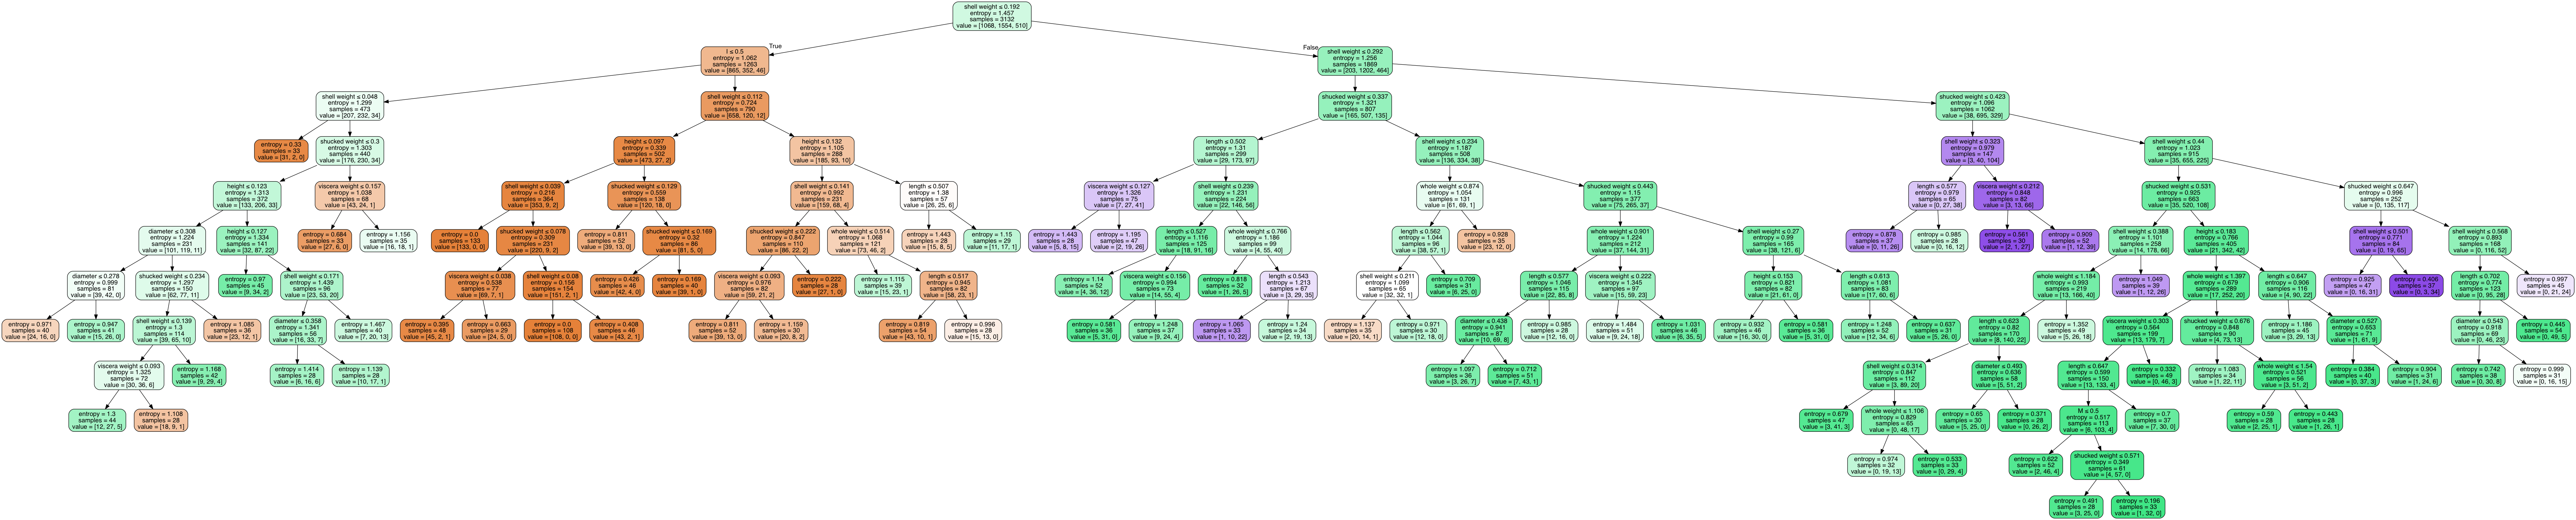

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from IPython.display import SVG, display
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=3000, unconfined=True)
#display(SVG(graph.create_svg()))

## Reduced error pruning

We prune leafes one by one untill we reduce the error on new data.
To learn more refer to the arcticle [Study of Various Decision Tree Pruning Methods with their Empirical Comparison in WEKA (4.1.1.)](https://pdfs.semanticscholar.org/025b/8c109c38dc115024e97eb0ede5ea873fffdb.pdf)

In [14]:
def prune(model, validation_X, validation_y, possible_score_drop=-0.02, possible_max_score_drop=-0.02, verbose=False):
    model = deepcopy(model)
    tree = model.tree_
    curent_score = model.score(validation_X, validation_y)
    init_score = curent_score
    changes = True
    while changes:
        changes = False
        leafs = np.where(tree.children_left == TREE_LEAF)[0]
        parents = get_parents(tree)
        for leaf in leafs:
            if leaf not in parents:
                continue
            parent = parents[leaf]
            backup = prune_tree(tree, parent)
            new_score = model.score(validation_X, validation_y)
            score_change = (new_score - curent_score) / curent_score
            full_score_change = (new_score - init_score) / curent_score
            if score_change < possible_score_drop or full_score_change < possible_max_score_drop:
                restore_tree(tree, parent, backup)
            else:
                if verbose:
                    print("Remove {:2} and {:2} leafs. Score change: {:.3f}".format(backup[0], backup[1], score_change))
                curent_score = new_score
                changes = True
                break
    if verbose:
        print("Finished.\n")
    return model

## Error complexity pruning

In error complexity pruning is concern with calculating error cost of a node by some cost function. To learn more refer to the arcticle [Study of Various Decision Tree Pruning Methods with their Empirical Comparison in WEKA (4.1.2.)](https://pdfs.semanticscholar.org/025b/8c109c38dc115024e97eb0ede5ea873fffdb.pdf)

In [15]:
from collections import defaultdict
from copy import deepcopy

def prune_tree(tree, node_to_prune):
    backup = (tree.children_left[node_to_prune],
              tree.children_right[node_to_prune], 
              tree.feature[node_to_prune])
    tree.children_left[node_to_prune] = TREE_LEAF
    tree.children_right[node_to_prune] = TREE_LEAF
    tree.feature[node_to_prune] = _tree.TREE_UNDEFINED
    return backup

def restore_tree(tree, node, backup):
    tree.children_left[node], tree.children_right[node], tree.feature[node] = backup

def node_error_cost(tree, node, full_examples=None):
    if full_examples is None:
        full_examples = np.sum(tree.value[0])
    return (np.sum(tree.value[node]) - np.max(tree.value[node])) / full_examples

def get_subtree_leaves(tree):
    stack = [(0, [])]
    subtree_leaves = defaultdict(list)
    while stack:
        #print(stack, end="\n\n")
        node, ancestors = stack.pop()
        if tree.children_left[node] == TREE_LEAF and tree.children_right[node] == TREE_LEAF:
            for a in ancestors:
                subtree_leaves[a].append(node)
            #subtree_leaves[node].append(node)
        else:
            new_ancestors = ancestors + [node]
            stack.append((tree.children_left[node], ancestors + [node]))
            stack.append((tree.children_right[node], ancestors + [node]))
    return subtree_leaves

def subtree_error_cost(tree, node, subtree_leaves, full_examples=None):
    if full_examples is None:
        full_examples = np.sum(tree.value[0])
    leaves = subtree_leaves[node]
    return sum(node_error_cost(tree, leaf, full_examples) for leaf in leaves)
        
def error_complexity(tree, node, subtree_leaves=None, full_examples=None):
    if full_examples is None:
        full_examples = np.sum(tree.value[0])
    if subtree_leaves is None:
        subtree_leaves = get_subtree_leaves(tree)
    _node_error_cost = node_error_cost(tree, node, full_examples) 
    _subtree_error_cost = subtree_error_cost(tree, node, subtree_leaves, full_examples) 
    return (_node_error_cost - _subtree_error_cost) / (len(subtree_leaves[0]) - 1)

def error_complexity_prune(init_model, validation_X, validation_y, verbose=False):
    model = deepcopy(init_model)
    tree = model.tree_
    subtree_leaves = get_subtree_leaves(tree)
    full_examples = np.sum(tree.value[0])
    best_score = init_model.score(validation_X, validation_y)
    best_model = None
    while len(subtree_leaves) != 0:
        min_score = 1
        prune_node = -1
        for node in subtree_leaves:
            error_complexity_score = error_complexity(tree, node, subtree_leaves, full_examples)
            if error_complexity_score < min_score:
                min_score = error_complexity_score
                prune_node = node
        prune_tree(tree, prune_node)
        score = model.score(validation_X, validation_y)
        if score >= best_score:
            if verbose:
                print("Prune {} node, Score diff: {}".format(prune_node, score - best_score))
            best_score = score 
            best_model = deepcopy(model)
        subtree_leaves = get_subtree_leaves(tree)
    if verbose:
        print("Finished.\n")
        
    return best_model

In [16]:
pruned_model = prune(model, test_X, test_y, verbose=True, possible_score_drop=0)
hard_pruned_model = prune(model, test_X, test_y, verbose=True)
complexity_pruned_model = error_complexity_prune(model, test_X, test_y, verbose=True)

Remove 13 and 14 leafs. Score change: 0.003
Remove 12 and 15 leafs. Score change: 0.000
Remove 18 and 19 leafs. Score change: 0.000
Remove 21 and 22 leafs. Score change: 0.000
Remove 20 and 23 leafs. Score change: 0.000
Remove 25 and 26 leafs. Score change: 0.001
Remove 30 and 31 leafs. Score change: 0.000
Remove 29 and 38 leafs. Score change: 0.000
Remove 33 and 34 leafs. Score change: 0.000
Remove 32 and 35 leafs. Score change: 0.000
Remove 36 and 37 leafs. Score change: 0.000
Remove 39 and 40 leafs. Score change: 0.000
Remove 41 and 42 leafs. Score change: 0.000
Remove 47 and 48 leafs. Score change: 0.000
Remove 46 and 49 leafs. Score change: 0.000
Remove 45 and 50 leafs. Score change: 0.003
Remove 51 and 52 leafs. Score change: 0.000
Remove 53 and 54 leafs. Score change: 0.000
Remove 62 and 63 leafs. Score change: 0.000
Remove 61 and 64 leafs. Score change: 0.001
Remove 60 and 75 leafs. Score change: 0.011
Remove 66 and 67 leafs. Score change: 0.000
Remove 65 and 70 leafs. Score ch

In [17]:
def tree_to_rules(tree, feature_names):
    from sklearn.tree import _tree as Tree
    
    tree = tree.tree_
    feature_names = [
        feature_names[i] if i != Tree.TREE_UNDEFINED else "TREE_UNDEFINED"
        for i in tree.feature
    ]
    queue = [(0, tuple())]
    rules = []
    while queue:
        node, path = queue.pop()
        if tree.feature[node] != Tree.TREE_UNDEFINED:
            name = feature_names[node]
            threshold = tree.threshold[node]
            queue.append((tree.children_left[node], path + ((name, False, threshold),)))  # <= threshold
            queue.append((tree.children_right[node], path + ((name, True, threshold),)))  # > threshold
        else:
            rules.append((path, tuple(tree.value[node][0])))
    return rules

In [18]:
rules = tree_to_rules(model, columns)
rules_pruned = tree_to_rules(pruned_model, columns)
rules_hard_pruned = tree_to_rules(hard_pruned_model, columns)
rules_comp_pruned = tree_to_rules(complexity_pruned_model, columns)

In [19]:
print(\
"Total rules length\n"
"Initial:                    {:3},\n"
"Reduced error pruning:      {:3},\n"
"Hard Reduced error pruning: {:3},\n"
"Error complexity pruning    {:3}.".format(
    sum([len(r[0]) for r in rules]), 
    sum([len(r[0]) for r in rules_pruned]), 
    sum([len(r[0]) for r in rules_hard_pruned]),
    sum([len(r[0]) for r in rules_comp_pruned])))
print()
print(\
"Total rules number (leaves number):\n"
"Initial:                    {:3},\n"
"Reduced error pruning:      {:3},\n"
"Hard Reduced error pruning: {:3},\n"
"Error complexity pruning    {:3}.".format(
    len(rules), 
    len(rules_pruned), 
    len(rules_hard_pruned), 
    len(rules_comp_pruned)))
print()
print(\
"Longest rule (tree depth):\n"
"Initial:                    {:3},\n"
"Reduced error pruning:      {:3},\n"
"Hard Reduced error pruning: {:3},\n"
"Error complexity pruning    {:3}.".format(
    tree_depth(model.tree_), 
    tree_depth(pruned_model.tree_), 
    tree_depth(hard_pruned_model.tree_), 
    tree_depth(complexity_pruned_model.tree_)))
print()
print(\
"Model scores on test data:\n"
"Initial:                    {:.3},\n"
"Reduced error pruning:      {:.3},\n"
"Hard Reduced error pruning: {:.3},\n"
"Error complexity pruning    {:.3}.".format(
    model.score(test_X, test_y), 
    pruned_model.score(test_X, test_y), 
    hard_pruned_model.score(test_X, test_y), 
    complexity_pruned_model.score(test_X, test_y)))

Total rules length
Initial:                    548,
Reduced error pruning:      107,
Hard Reduced error pruning:  54,
Error complexity pruning     75.

Total rules number (leaves number):
Initial:                     78,
Reduced error pruning:       21,
Hard Reduced error pruning:  12,
Error complexity pruning     16.

Longest rule (tree depth):
Initial:                     11,
Reduced error pruning:        7,
Hard Reduced error pruning:   6,
Error complexity pruning      7.

Model scores on test data:
Initial:                    0.69,
Reduced error pruning:      0.703,
Hard Reduced error pruning: 0.678,
Error complexity pruning    0.694.


Before


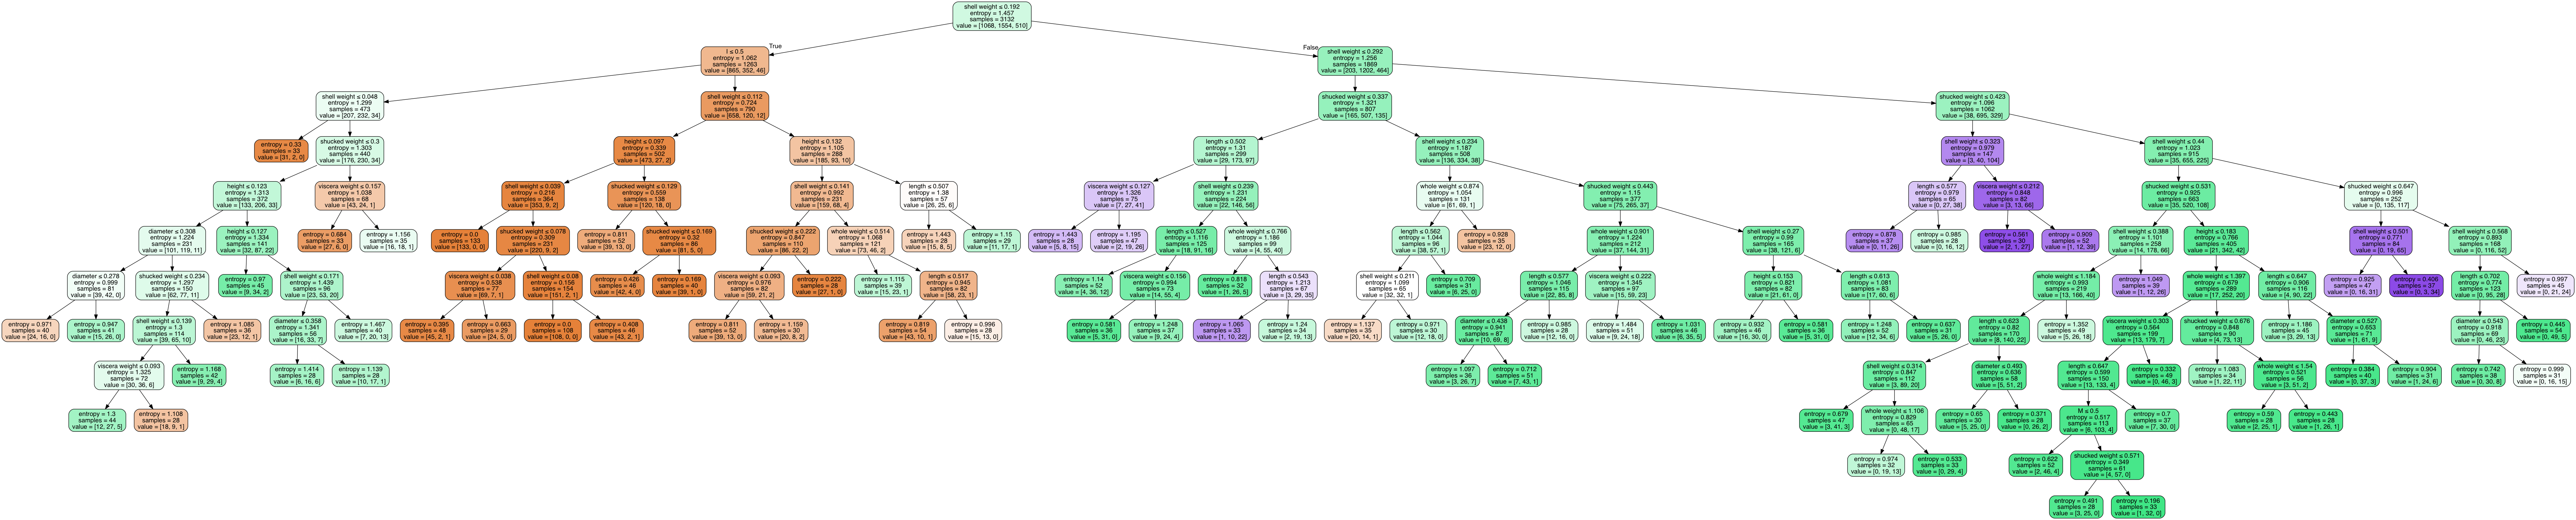

In [20]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print("Before")
Image(graph.create_png())

After


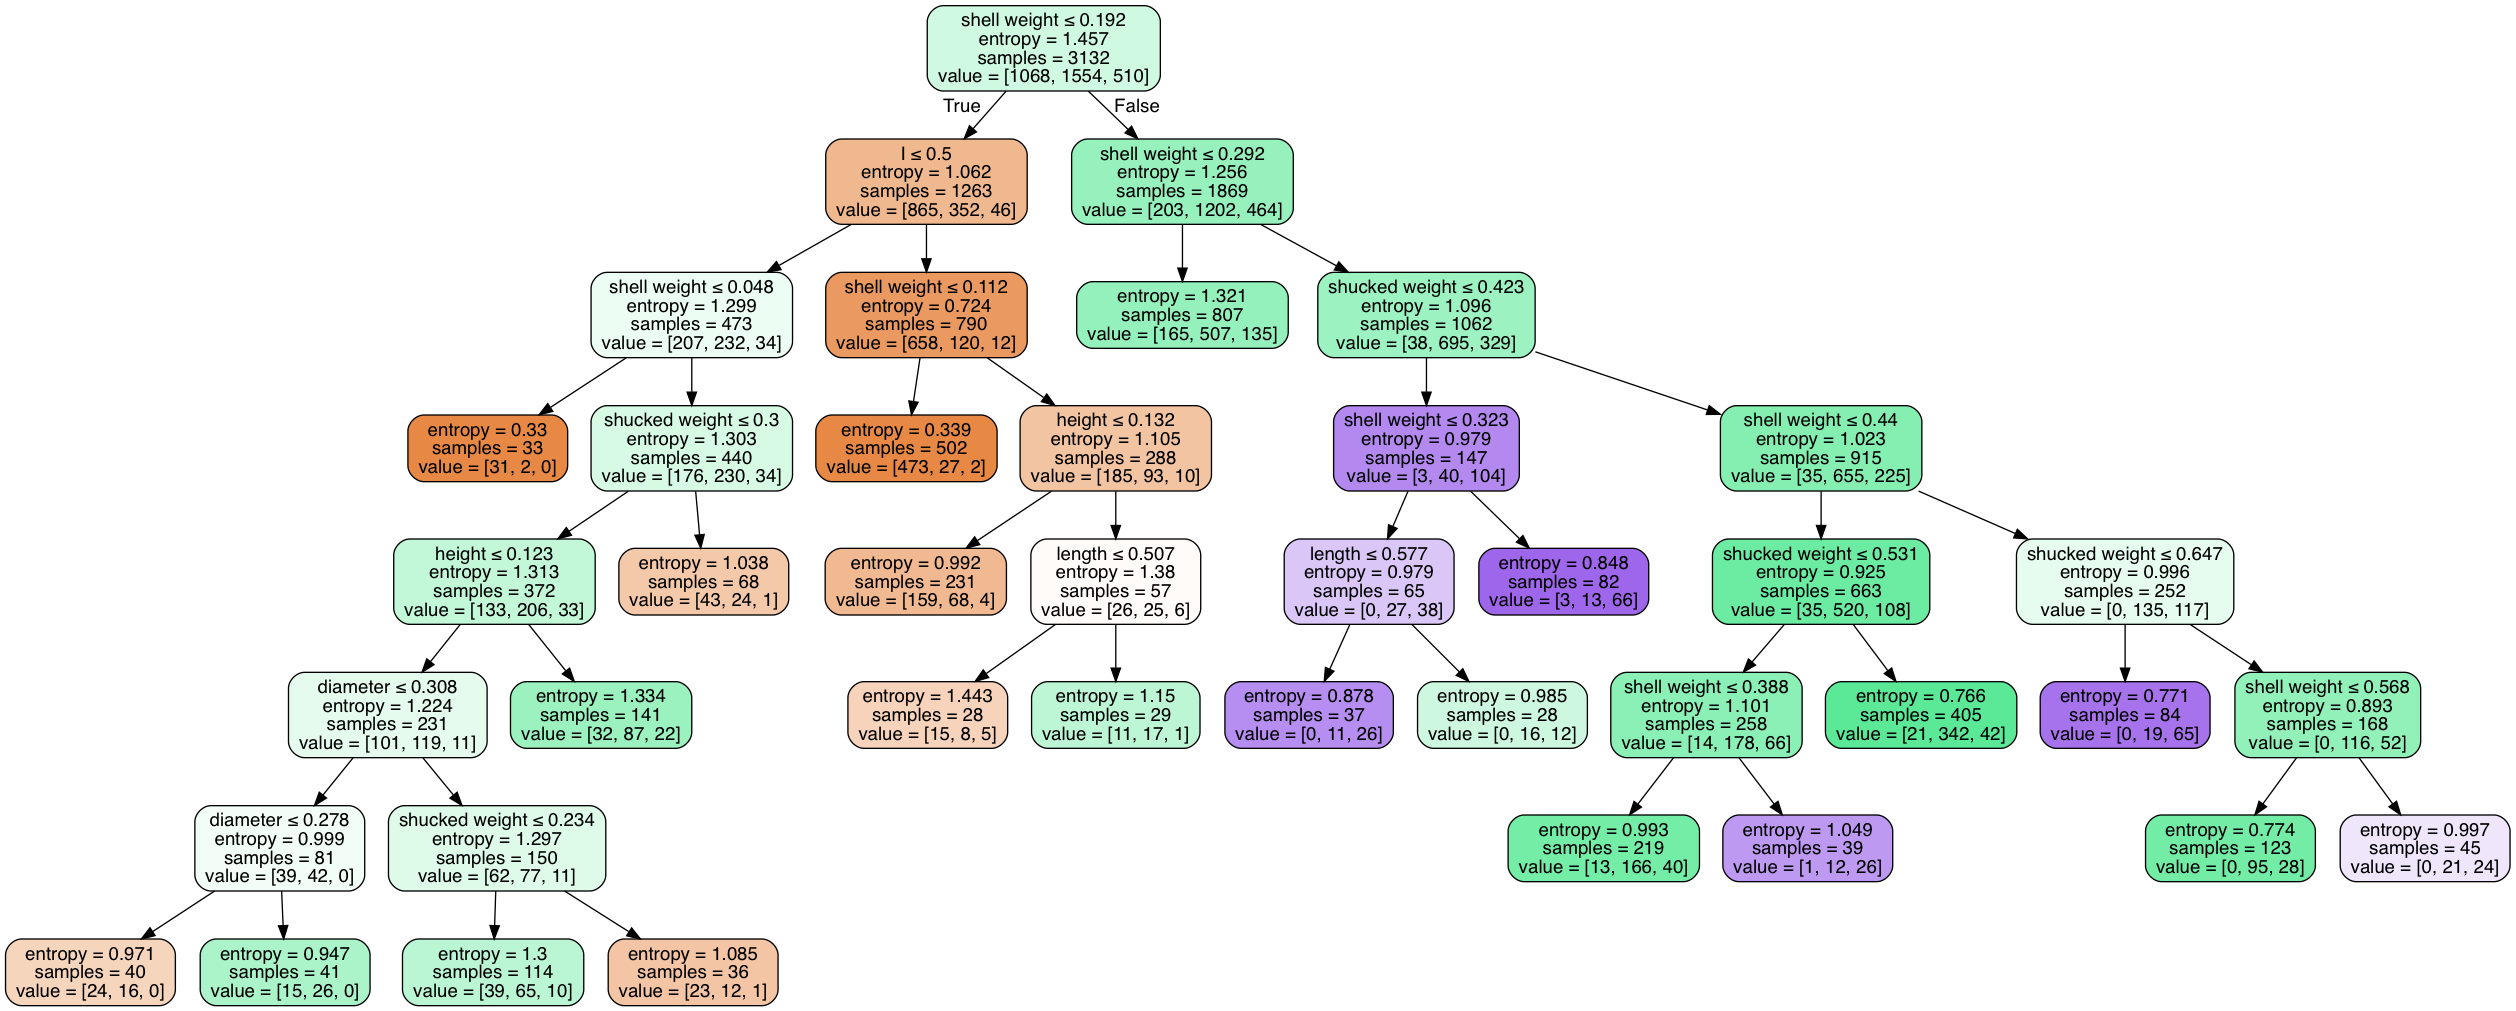

In [21]:
dot_data = StringIO()
export_graphviz(pruned_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print("After")
Image(graph.create_png())